## Explore  a heatmaps of DayOne diary entries
Alex Oulton Dec 2024 
* day of week by month
* date by month 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json 


In [2]:
with open('Journal.json',encoding='utf8') as file:
    diaryData = json.load(file)
    
df = pd.DataFrame(diaryData["entries"])
df =df.drop(columns=['text', 'creationOSVersion', 'richText','photos'])

In [3]:
# Convert creationDate to datetime and set as index

journal_counts = pd.DataFrame(pd.to_datetime(df["creationDate"]).value_counts())
#journal_counts.set_index("creationDate", inplace=True)  # the date has been set as index so don't need to do this?

In [4]:
print(journal_counts.index)
#type(journal_counts)

DatetimeIndex(['2019-11-17 12:00:00+00:00', '2020-03-14 12:00:00+00:00',
               '2018-01-22 03:00:00+00:00', '2019-09-07 11:00:00+00:00',
               '2017-06-03 03:00:00+00:00', '2018-01-21 03:00:00+00:00',
               '2021-04-30 23:00:00+00:00', '2015-10-11 03:00:00+00:00',
               '2019-07-12 11:00:00+00:00', '2017-08-18 11:00:00+00:00',
               ...
               '2018-04-18 22:05:41+00:00', '2018-04-19 08:00:15+00:00',
               '2018-04-20 16:22:49+00:00', '2018-04-21 13:02:04+00:00',
               '2018-04-21 22:37:22+00:00', '2018-04-22 11:00:00+00:00',
               '2018-04-22 11:34:41+00:00', '2018-04-23 07:39:55+00:00',
               '2018-04-23 11:00:00+00:00', '2024-12-21 18:59:40+00:00'],
              dtype='datetime64[ns, UTC]', name='creationDate', length=3429, freq=None)


In [5]:
#df.sort_index()
#daily_counts = df['creationDate'].dt.date.value_counts().sort_index()
# for an index daily_counts = df.index.to_series().dt.date.value_counts().sort_index()
# comprehension listzeros = [1 for _ in range(len(df))]


#journal_dates = df[['creationDate']]

#print (type(journal_count['creationDate'][0]))
#journal_dates['creationDate'] = pd.to_datetime(journal_dates['creationDate'])
#print (type(journal_count['creationDate'][0]))


In [6]:
# remove entries before Jan 1 2015
#df = df[df.index >= cutoff_date]
#daily_counts = daily_counts[daily_counts.index > '2014-12-31']

In [7]:

journal_counts["day_of_week"] = journal_counts.index.day_name()
journal_counts["month"] = journal_counts.index.month_name()
#heatmap_data = data_frame.groupby(["month", "day_of_week"])["value"].sum().unstack()

In [8]:
journal_counts

,count,day_of_week,month
creationDate,,,
2019-11-17 12:00:00+00:00,3,Sunday,November
2020-03-14 12:00:00+00:00,2,Saturday,March
2018-01-22 03:00:00+00:00,2,Monday,January
2019-09-07 11:00:00+00:00,2,Saturday,September
2017-06-03 03:00:00+00:00,2,Saturday,June
...,...,...,...
2018-04-22 11:00:00+00:00,1,Sunday,April
2018-04-22 11:34:41+00:00,1,Sunday,April
2018-04-23 07:39:55+00:00,1,Monday,April


In [9]:
heatmap_data = journal_counts.groupby(["month", "day_of_week"])["count"].sum().unstack()

In [10]:
heatmap_data

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,32,43,47,64,32,36,37
August,36,45,55,57,41,49,38
December,46,34,38,41,45,41,46
February,33,33,42,51,30,36,26
January,36,43,39,57,21,39,34
July,39,42,51,67,38,54,34
June,49,34,43,56,34,37,42
March,41,34,49,50,39,41,45
May,35,38,46,54,35,38,25


In [11]:

# Reorder days and months for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
heatmap_data = heatmap_data.reindex(index=months_order, columns=days_order)

In [12]:
heatmap_data

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
January,43,39,34,21,36,39,57
February,33,36,26,30,33,42,51
March,34,41,45,39,41,49,50
April,43,36,37,32,32,47,64
May,38,38,25,35,35,46,54
June,34,37,42,34,49,43,56
July,42,54,34,38,39,51,67
August,45,49,38,41,36,55,57
September,35,41,41,29,32,49,41


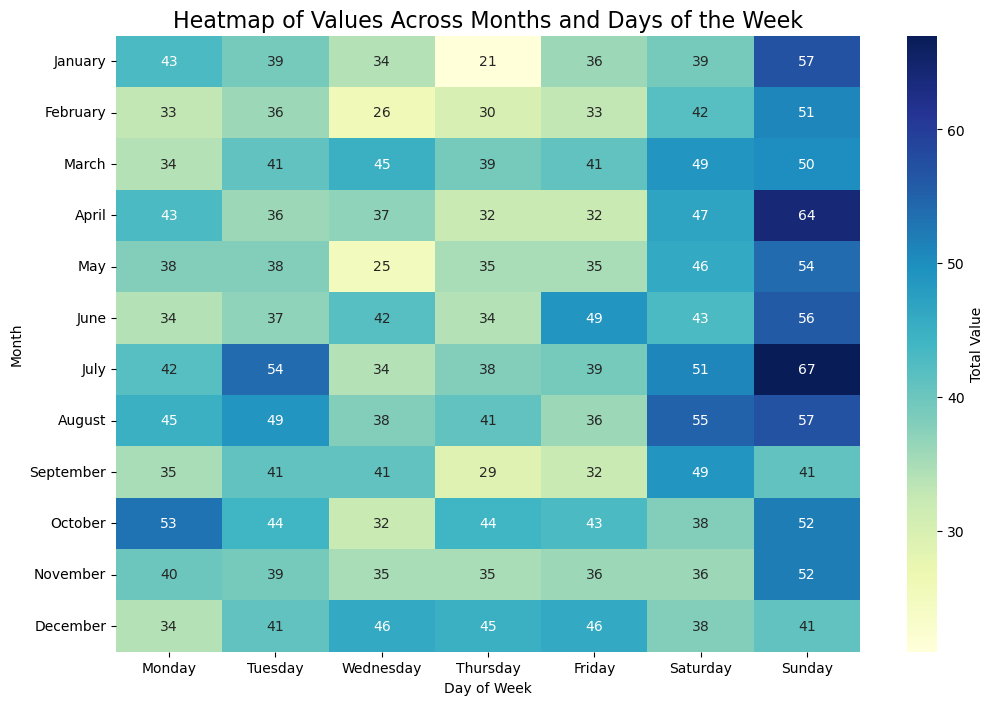

In [13]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Value'})
plt.title("Heatmap of Values Across Months and Days of the Week", fontsize=16)
plt.ylabel("Month")
plt.xlabel("Day of Week")
plt.show()

In [18]:
journal_counts["DateM"] = journal_counts.index.strftime("%d")
# converts timestamp to the day part of the date
# strftime timestamp to string. 
# strptime string to timestamp - ("%Y-%m-%d %H:%M:%S") 

heatmap_data01 = journal_counts.groupby(["month", "DateM"])["count"].sum().unstack()


In [19]:
journal_counts

,count,day_of_week,month,DateM
creationDate,,,,
2019-11-17 12:00:00+00:00,3,Sunday,November,17
2020-03-14 12:00:00+00:00,2,Saturday,March,14
2018-01-22 03:00:00+00:00,2,Monday,January,22
2019-09-07 11:00:00+00:00,2,Saturday,September,07
2017-06-03 03:00:00+00:00,2,Saturday,June,03
...,...,...,...,...
2018-04-22 11:00:00+00:00,1,Sunday,April,22
2018-04-22 11:34:41+00:00,1,Sunday,April,22
2018-04-23 07:39:55+00:00,1,Monday,April,23


In [20]:
heatmap_data01 = heatmap_data01.reindex(index=months_order)

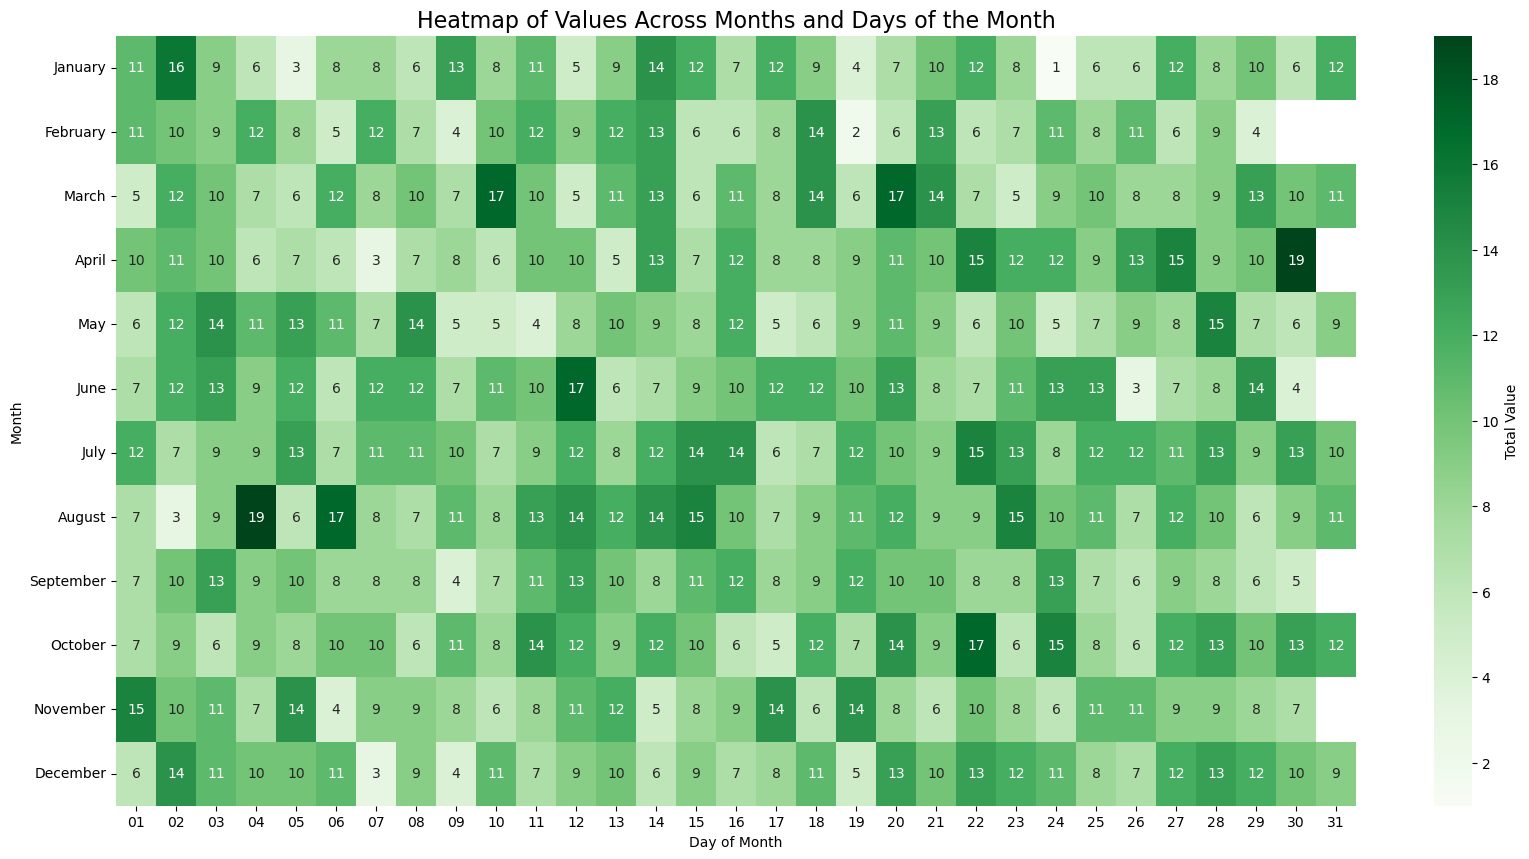

In [21]:
# Plot the heatmap with dates not week days
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data01, annot=True, fmt=".0f", cmap="Greens", cbar_kws={'label': 'Total Value'})
plt.title("Heatmap of Values Across Months and Days of the Month", fontsize=16)
plt.ylabel("Month")
plt.xlabel("Day of Month")
plt.show()